In [1]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

### 1.

#### a)

In [2]:
def bisection(f, l, r, iterations=100):  # l, r -> (l, r]
    if f(r) == 0:
        return r
    
    if f(r) > 0:
        sign = 1
    else:
        sign = -1
        
    m = (l + r) / 2
    
    for _ in range(iterations):
        if f(m)*sign < 0:
            l = m
        elif f(m)*sign > 0:
            r = m
        else:
            break
        
        m = (l + r) / 2
    
    return m

In [3]:
def root_by_bisection(a, k, iterations=100):
    def f(x):
        return x**k - a
    
    l, r = 0, max(a, 1)
    return bisection(f, l, r, iterations)

In [4]:
root_by_bisection(0.0625, 4)

0.5

In [5]:
root_by_bisection(125, 3)

5.0

#### b)

In [6]:
def Newton_method(f, dfdx, x0, iterations=100):
    x = x0
    
    for _ in range(iterations):
        if f(x) == 0:
            break
        
        x -= f(x) / dfdx(x)
    
    return x

In [7]:
def root_by_Newton_method(a, k, iterations=100):
    def f(x):
        return x**k - a
    
    def dfdx(x):
        return k * x**(k - 1)
    
    x0 = max(a / 2, 1)
    
    return Newton_method(f, dfdx, x0, iterations)

In [8]:
root_by_Newton_method(0.0625, 4)

0.5

In [9]:
root_by_Newton_method(125, 3)

5.0

### 2.

#### a)

In [10]:
poly = Polynomial([0.2, 0, -3, 1, 5, 1])
poly_l, poly_r = -1, 1

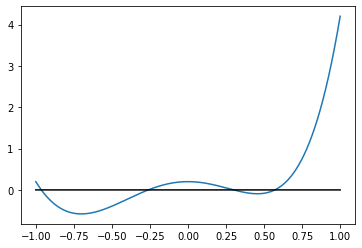

In [11]:
fig, ax = plt.subplots()

x = np.linspace(poly_l, poly_r, 10000)
y = poly(x)

ax.plot(x, y)
ax.plot(x, np.zeros(10000), 'black')

plt.show()

In [12]:
def polynomial_gcd(a, b):
    a_, b_ = a.copy(), b.copy()
    while not (b_.degree() == 0 and b_.coef[0] == 0):
        a_, b_ = b_, a_ % b_
    return a_

In [13]:
def localize_roots(poly, l, r):  # [1, 2, 3] -> 1 + 2x + 3x^2
    def Sturm_series_value(x):   # l, r -> (l, r]
        sign = 0
        sign_changes = 0
        for poly in Sturm_sequence:
            if poly(x) > 0:
                if sign < 0:
                    sign_changes += 1
                
                sign = 1
            
            elif poly(x) < 0:
                if sign > 0:
                    sign_changes += 1
                
                sign = -1
        
        return sign_changes
    
    def find_roots(l, r):
        V_l = Sturm_series_value(l)
        V_r = Sturm_series_value(r)
        
        if V_l - V_r == 0:
            return []
        elif V_l - V_r == 1:
            return[(l, r)]
        
        m = (l + r) / 2
        found_root_loc = []
        found_root_loc.extend(find_roots(l, m))
        found_root_loc.extend(find_roots(m, r))
        
        return found_root_loc
    
    p = poly.copy()
    
    if p.degree() == 0:
        raise ValueError("The polynomial's degree is 0")
    
    p //= polynomial_gcd(p, p.deriv(1))
    p /= p.coef[-1]
    
    Sturm_sequence = [p.copy(), p.deriv(1).copy()]
    
    while Sturm_sequence[-1].degree() > 0:
        Sturm_sequence.append(-(Sturm_sequence[-2] % Sturm_sequence[-1]))
        
    return find_roots(l, r)
    

In [14]:
localize_roots(poly, poly_l, poly_r)

[(-1, -0.5), (-0.5, 0.0), (0.0, 0.5), (0.5, 1)]

#### b)

In [15]:
def find_roots(poly, l, r):
    p = poly.copy()
    
    roots_loc = localize_roots(p, l, r)
    
    p //= polynomial_gcd(p, p.deriv(1))
    p /= p.coef[-1]
    
    roots = [bisection(p, loc[0], loc[1]) for loc in roots_loc]
    return roots

In [16]:
find_roots(poly, poly_l, poly_r)

[-0.9636567143281951,
 -0.2608947046884449,
 0.2999262819638956,
 0.5708565856566035]

#### c)

In [17]:
def find_global_minimum(poly, l, r):
    possible_minimum_points = [l, r]
    possible_minimum_points.extend(find_roots(poly.deriv(1), l, r))
    minimum = poly(l)
    global_minimum_point = l
    
    for point in possible_minimum_points:
        value = poly(point)
        if value < minimum:
            minimum = value
            global_minimum_point = point
    
    return global_minimum_point

In [18]:
find_global_minimum(poly, poly_l, poly_r)

-0.7008494701342523

### 3.

Сумма выпуклых функций выпукла. У данной функции будет ровно один глобальный минимум. Найдем нуль производной.

In [19]:
def make_convex_f(a, b, c, d):
    def convex_f(x):
        return np.e**(a*x) + np.e**(-b*x) + c*(x - d)**2
    
    def dconvex_fdx(x):
        return a*np.e**(a*x) - b*np.e**(-b*x) + 2*c*(x - d)
    
    def d2convex_fdx2(x):
        return a*a*np.e**(a*x) + b*b*np.e**(-b*x) + 2*c
    
    return convex_f, dconvex_fdx, d2convex_fdx2

In [20]:
a, b, c, d = 1, 1, 1, 1

convf, dconvfdx, d2convfdx2 = make_convex_f(a, b, c, d)

#### a)

In [21]:
def find_zero_of_monotonic_function_by_bisection(f):
    l, r = -1, 1
    while f(2*l) > 0:
        l *= 2
    while f(2*r) < 0:
        r *= 2
    
    return bisection(f, l, r)

In [22]:
min_bisection = find_zero_of_monotonic_function_by_bisection(dconvfdx)
min_bisection

0.49007306848054777

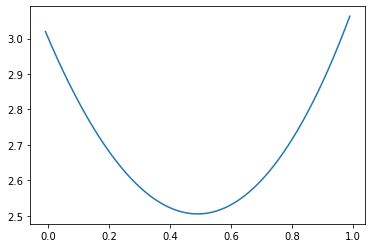

In [23]:
fig, ax = plt.subplots()

x = np.linspace(min_bisection-0.5, min_bisection+0.5, 1000)
y = convf(x)

ax.plot(x, y)

plt.show()

#### b)

In [24]:
def find_zero_of_monotonic_function_by_Newton_method(f, dfdx):
    l, r = -1, 1
    while f(2*l) > 0:
        l *= 2
    while f(2*r) < 0:
        r *= 2
    
    x0 = (l + r) / 2
    
    return Newton_method(f, dfdx, x0)

In [25]:
min_Newton = find_zero_of_monotonic_function_by_Newton_method(dconvfdx, d2convfdx2)
min_Newton

0.4900730684805477

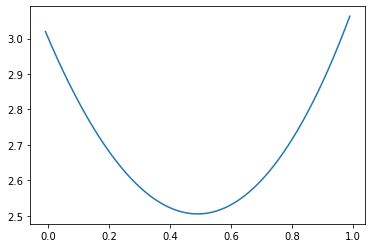

In [26]:
fig, ax = plt.subplots()

x = np.linspace(min_Newton-0.5, min_Newton+0.5, 1000)
y = convf(x)

ax.plot(x, y)

plt.show()

#### c)

In [43]:
def ternary_search(f, l, r, iterations=100):
    for _ in range(iterations):
        inner_l = (2*l + r) / 3
        inner_r = (l + 2*r) / 3
        
        if f(inner_l) > f(inner_r):
            l = inner_l
        else:
            r = inner_r
    
    return (l + r) / 2

In [44]:
def find_minimum_of_convex_function_by_ternary_search(f):
    l, r = -1, 1
    while f(2*l) <= f(l):
        l *= 2
    while f(2*r) <= f(r):
        r *= 2
    
    return ternary_search(f, l, r)

In [45]:
min_ter = find_minimum_of_convex_function_by_ternary_search(convf)
min_ter

0.4900730607271974

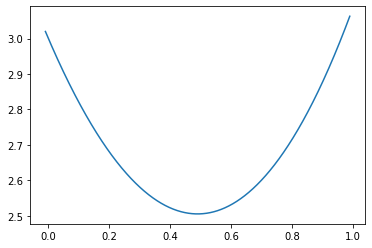

In [30]:
fig, ax = plt.subplots()

x = np.linspace(min_ter-0.5, min_ter+0.5, 1000)
y = convf(x)

ax.plot(x, y)

plt.show()